In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Лабораторная работа 4.1
### Численные методы решения задачи Коши

In [2]:
def euler_method(f, y_0, dy_0, h, left_x, right_x):
    x = np.arange(left_x, right_x+h, h)
    y = np.empty_like(x)
    z = np.empty_like(x)
    y[0] = y_0
    z[0] = dy_0

    for i in range(1, len(x)):
        z[i] = z[i-1]+h*f(x[i-1], y[i-1], z[i-1])
        y[i] = y[i-1]+h*z[i-1]

    return x, y

$x^2y''+xy'-y-3x^2=0$

$y''=\frac{-xy'+y+3x^2}{x^2}$

$
 \begin{cases}
   y'=z \\
   z'=\frac{-xz+y+3x^2}{x^2}
 \end{cases}
$

In [3]:
def true_y(x):
    return x**2+x+(1/x)

In [4]:
def f(x, y, z):
    return (-x*z+y+3*x**2)/(x**2)

y_0 = 3
dy_0 = 2
left_x = 1
right_x = 2
h = 0.1

x, y = euler_method(f, y_0, dy_0, h, left_x, right_x)

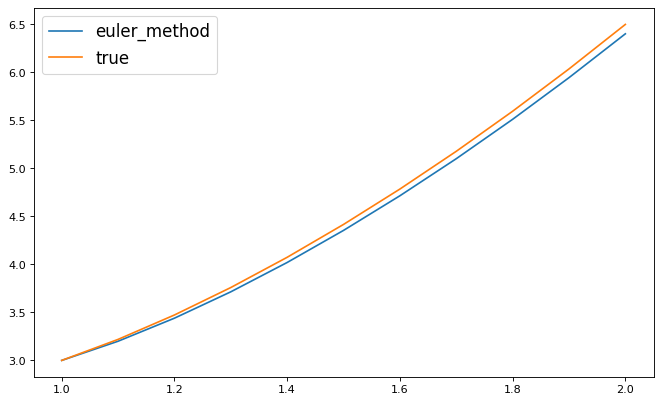

In [5]:
x = np.arange(left_x, right_x+h, h)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y, label = 'euler_method')
plt.plot(x, true_y(x), label = 'true')
plt.legend(loc=0, prop={'size': 15})
plt.show()

In [6]:
def runge_kutti_method(f, y_0, dy_0, h, left_x, right_x):
    x = np.arange(left_x, right_x+h, h)
    y = np.empty_like(x)
    z = np.empty_like(x)
    y[0] = y_0
    z[0] = dy_0

    for i in range(1, len(x)):
        K1 = h*z[i-1]
        L1 = h*f(x[i-1], y[i-1], z[i-1])
        K2 = h*(z[i-1]+(1/2)*L1)
        L2 = h*f(x[i-1]+(1/2)*h, y[i-1]*(1/2)*K1, z[i-1]+(1/2)*L1)
        K3 = h*(z[i-1]+(1/2)*L2)
        L3 = h*f(x[i-1]+(1/2)*h, y[i-1]+(1/2)*K2, z[i-1]+(1/2)*L2)
        K4 = h*(z[i-1]+L3)
        L4 = h*f(x[i-1]+h, y[i-1]+K3, z[i-1]+L3)

        delta_y = (1/6)*(K1+2*K2+2*K3+K4)
        delta_z = (1/6)*(L1+2*L2+2*L3+L4)

        y[i] = y[i-1]+delta_y
        z[i] = z[i-1]+delta_z

    return x, y

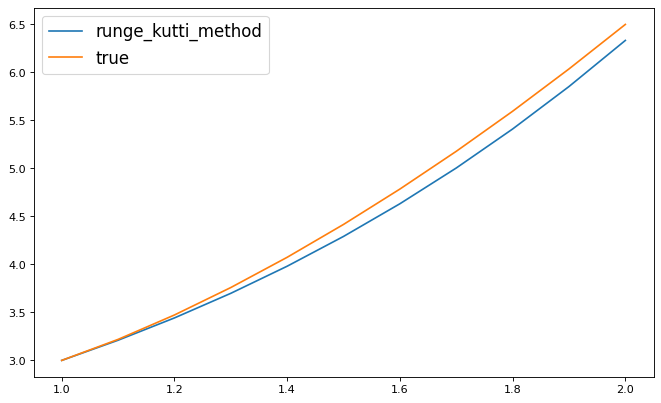

In [7]:
def f(x, y, z):
    return (2*x*z)/(x**2+1)

y_0 = 3
dy_0 = 2
left_x = 1
right_x = 2
h = 0.1

x, y = runge_kutti_method(f, y_0, dy_0, h, left_x, right_x)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y, label = 'runge_kutti_method')
plt.plot(x, true_y(x), label = 'true')
plt.legend(loc=0, prop={'size': 15})
plt.show()

Погрешность метода Рунге-Кутты

In [8]:
e = abs(y-true_y(x))
e

array([0.        , 0.00875778, 0.0306671 , 0.06023145, 0.09295333,
       0.12500124, 0.15300156, 0.17390386, 0.18489116, 0.18331845,
       0.16666976])

In [9]:
def adams_method(f, y_0, dy_0, h, left_x, right_x):
    def runge_kutti_method(f, y_0, dy_0, h, left_x, right_x):
        x = np.arange(left_x, right_x+h, h)
        y = np.empty_like(x)
        z = np.empty_like(x)
        y[0] = y_0
        z[0] = dy_0

        for i in range(1, len(x)):
            K1 = h*z[i-1]
            L1 = h*f(x[i-1], y[i-1], z[i-1])
            K2 = h*(z[i-1]+(1/2)*L1)
            L2 = h*f(x[i-1]+(1/2)*h, y[i-1]*(1/2)*K1, z[i-1]+(1/2)*L1)
            K3 = h*(z[i-1]+(1/2)*L2)
            L3 = h*f(x[i-1]+(1/2)*h, y[i-1]+(1/2)*K2, z[i-1]+(1/2)*L2)
            K4 = h*(z[i-1]+L3)
            L4 = h*f(x[i-1]+h, y[i-1]+K3, z[i-1]+L3)

            delta_y = (1/6)*(K1+2*K2+2*K3+K4)
            delta_z = (1/6)*(L1+2*L2+2*L3+L4)

            y[i] = y[i-1]+delta_y
            z[i] = z[i-1]+delta_z

        return y, z

    start_y, start_z = runge_kutti_method(f, y_0, dy_0, h, left_x, left_x+2*h)

    x = np.arange(left_x, right_x+h, h)
    y = np.empty_like(x)
    z = np.empty_like(x)
    y[0] = y_0
    z[0] = dy_0

    for i in range(1, 4):
        y[i] = start_y[i]
        z[i] = start_z[i]

    for i in range(4, len(x)):
        z[i] = z[i-1]+(h/24)*(55*f(x[i-1], y[i-1], z[i-1])-59*f(x[i-2], y[i-2], z[i-2])+37*f(x[i-3], y[i-3], z[i-3])-9*f(x[i-4], y[i-4], z[i-4]) )
        y[i] = y[i-1]+h*z[i-1]

    return x, y

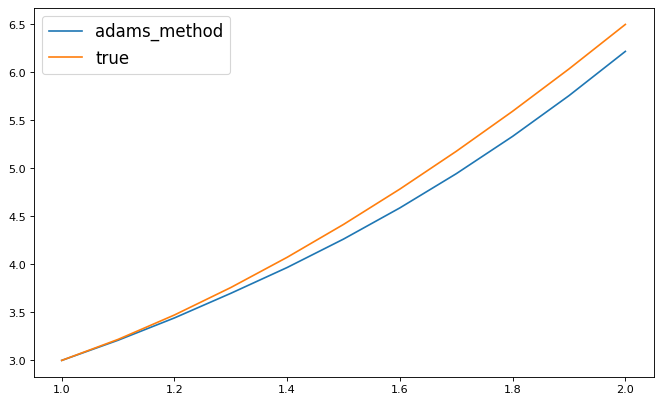

In [10]:
def f(x, y, z):
    return (2*x*z)/(x**2+1)

y_0 = 3
dy_0 = 2
left_x = 1
right_x = 2
h = 0.1

x, y = adams_method(f, y_0, dy_0, h, left_x, right_x)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y, label = 'adams_method')
plt.plot(x, true_y(x), label = 'true')
plt.legend(loc=0, prop={'size': 15})
plt.show()

# Лабораторная работа 4.2
### Численные методы решение краевой задачи для ОДУ

In [11]:
def shooting_method(f, y_0, h, left_x, right_x, end_value, e):
    def runge_kutti_method(f, y_0, dy_0, h, left_x, right_x):
        x = np.arange(left_x, right_x+h, h)
        y = np.empty_like(x)
        z = np.empty_like(x)
        y[0] = y_0
        z[0] = dy_0

        for i in range(1, len(x)):
            K1 = h*z[i-1]
            L1 = h*f(x[i-1], y[i-1], z[i-1])
            K2 = h*(z[i-1]+(1/2)*L1)
            L2 = h*f(x[i-1]+(1/2)*h, y[i-1]*(1/2)*K1, z[i-1]+(1/2)*L1)
            K3 = h*(z[i-1]+(1/2)*L2)
            L3 = h*f(x[i-1]+(1/2)*h, y[i-1]+(1/2)*K2, z[i-1]+(1/2)*L2)
            K4 = h*(z[i-1]+L3)
            L4 = h*f(x[i-1]+h, y[i-1]+K3, z[i-1]+L3)

            delta_y = (1/6)*(K1+2*K2+2*K3+K4)
            delta_z = (1/6)*(L1+2*L2+2*L3+L4)

            y[i] = y[i-1]+delta_y
            z[i] = z[i-1]+delta_z

        return y

    n0, n = 1, 0.8

    solution0 = runge_kutti_method(f, y_0, n0, h, left_x, right_x)
    solution0_y = solution0[-1]
    solution = runge_kutti_method(f, y_0, n, h, left_x, right_x)
    solution_y = solution[-1]

    prev_n = n0
    prev_solution_y = solution0_y

    while abs(abs(solution_y-end_value) >= e):
        next_n = n-((n-prev_n)/(solution_y-prev_solution_y))*(solution_y-end_value)
       
        prev_n = n
        n = next_n

        prev_solution = runge_kutti_method(f, y_0, prev_n, h, left_x, right_x)
        prev_solution_y = prev_solution[-1]
        solution = runge_kutti_method(f, y_0, n, h, left_x, right_x)
        solution_y = solution[-1]

    return np.arange(left_x, right_x+h, h), solution

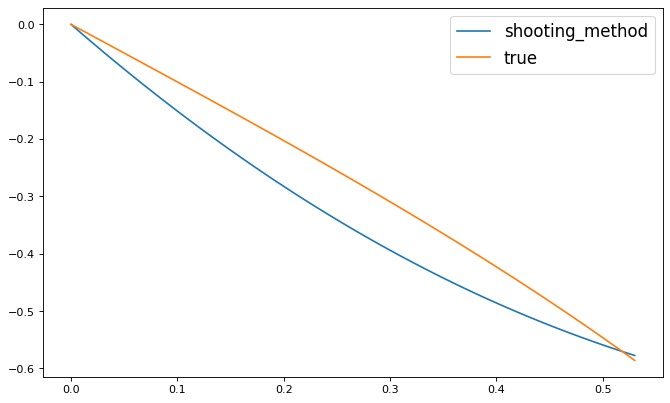

In [12]:
def true_y(x):
    return x**3+x**2+2

def f(x, y, z):
    print(x, y, z)
    return (4*(x**2+3)*z-6*x*y)/(x*(x**2+6))

# 6
def true_y(x):
    return -np.tan(x)

def f(x, y, z):
    return 2*(1+(np.tan(x)**2)*y)


y_0 = 0
left_x = 0
right_x = np.pi/6
end_value = -np.sqrt(3)/3
h = 0.01

e = 0.00001

x, y = shooting_method(f, y_0, h, left_x, right_x, end_value, e)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y, label = 'shooting_method')
plt.plot(x, true_y(x), label = 'true')
plt.legend(loc=0, prop={'size': 15})
plt.show()

In [30]:
def finite_difference_method(p, q, h, left_x, right_x, y_0, alpha, beta, c):
    
    x = np.arange(left_x, right_x+h, h)
    n = len(x)
    A = np.zeros((n, n))

    A[0, 0] = 1
    A[-1, -3] = alpha/(2*h)
    A[-1, -2] = (-4*alpha)/(2*h)
    A[-1, -1] = ((3*alpha)/(2*h))+beta
    for i in range(1, n-1):
        A[i, i-1] = (1/h**2)-p(x[i])/(2*h)
        A[i, i] = (-2/h**2)+q(x[i])
        A[i, i+1] = (1/h**2)+p(x[i])/(2*h)
    
    b = np.zeros(n)
    b[0] = y_0
    b[-1] = c

    # print(A)
    # print(b)

    y = np.linalg.solve(A, b)

    return x, y

[[   1.            0.            0.            0.            0.
     0.            0.        ]
 [ 100.         -202.02013409  100.            0.            0.
     0.            0.        ]
 [   0.          100.         -202.08218272  100.            0.
     0.            0.        ]
 [   0.            0.          100.         -202.19137783  100.
     0.            0.        ]
 [   0.            0.            0.          100.         -202.35750821
   100.            0.        ]
 [   0.            0.            0.            0.          100.
  -202.59689282  100.        ]
 [   0.            0.            0.            0.            0.
     0.            1.        ]]
[ 0.          0.          0.          0.          0.          0.
 -0.57735027]


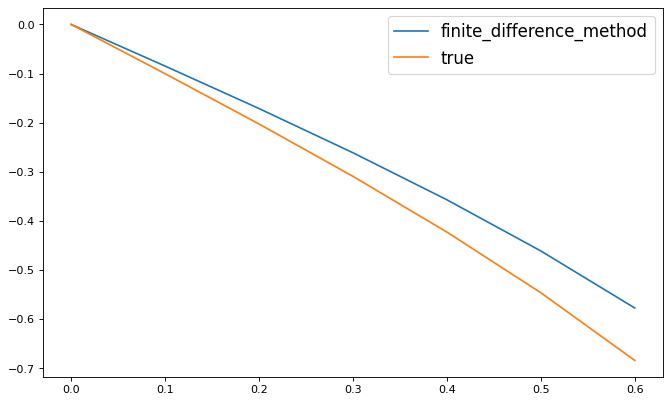

In [33]:
def p(x):
    return -x
def q(x):
    return -1
y_0 = 1 
h = 0.2
left_x = 0
right_x = 1
alpha = 1
beta = 2
c = 0


def true_y(x):
    return -np.tan(x)

def p(x):
    return 0
def q(x):
    return -2*(1+(np.tan(x)**2))
y_0 = 0
h = 0.1
left_x = 0
right_x = np.pi/6
alpha = 0
beta = 1
c = -np.sqrt(3)/3

x, y = finite_difference_method(p, q, h, left_x, right_x, y_0, alpha, beta, c)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(x, y, label = 'finite_difference_method')
plt.plot(x, true_y(x), label = 'true')
plt.legend(loc=0, prop={'size': 15})
plt.show()